# Perturbation Methods

### Exercise 1
On differentiating equation (6) with respect to $u$ and following the steps to reach (5) we get: 
$$x_{uuu} =-\frac{F_{xxx}x_u^3 + 3F_{xxu}x_u^2 + 3F_{xx}x_{uu}x_u + 3F_{xuu}x_u + 3F_{xu}x_{uu} + F_{uuu}}{F_x}$$

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_FindSS import LinApp_FindSS

%matplotlib inline

### Exercise 2


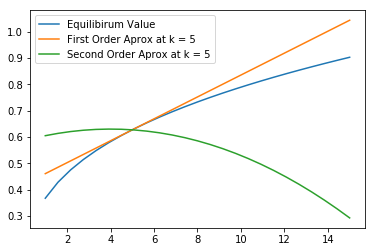

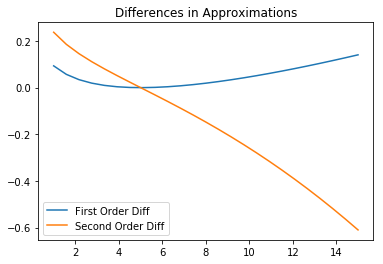

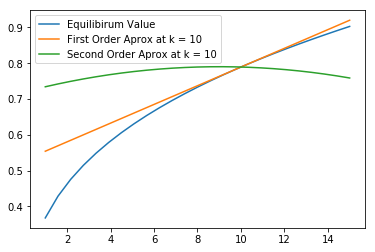

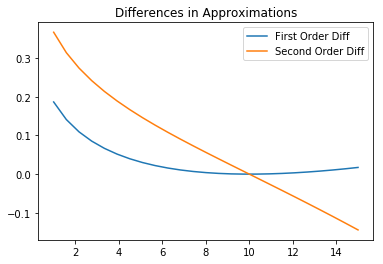

In [2]:
#initialize paramters
alpha = .33
z = 1
b = 2
t = .1    
h = 24

#create kgrid
kgrid = np.linspace(1,15,25)

# variable functions
def l_supply(w, pi, k):
    return h - (b/(w*(1 + b)))*(w*h + pi - t)

def l_demand(w, k):
    return ((1 - alpha)*z/w)**(1/alpha)*k

def profit(w, nd, k):
    return z*k**alpha*nd**(1 - alpha) - w * nd

def get_w(k1):
    if k1 < 5:
        state_init = 0.3
    else:
        state_init  = 0.8
    args = (alpha, k1, z, b, t, h)
    return opt.fsolve(euler, state_init, args = args)[0]

def euler(state, *args):
    alpha, k, z, b, t, h = args
    nd = l_demand(state, k)
    pi = profit(state, nd ,k)
    ns = l_supply(state, pi, k)
    error = nd - ns
    return error

def der1(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def der2(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def first_approx(f, x0, x):
     return f(x0) + der1(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + der2(f, x0)*(x - x0) + 0.5* der2(f,x0)*(x - x0) ** 2

# initialise state
state_init = 0.8
k = 5
args = (alpha, k, z, b, t, h)
w = opt.fsolve(euler, state_init, args = args)[0]

f  = lambda x: get_w(x)
weq = np.zeros_like(kgrid)
wfirst = np.zeros_like(kgrid)
wsecond = np.zeros_like(kgrid)

# for k=5
for i in range(len(kgrid)):
    weq[i] = get_w(kgrid[i])
    wfirst[i] = first_approx(f,5,kgrid[i])
    wsecond[i] = second_approx(f,5,kgrid[i])
    
plt.plot(kgrid, weq , label  = "Equilibirum Value")
plt.plot(kgrid, wfirst, label  = "First Order Aprox at k = 5")
plt.plot(kgrid, wsecond, label  = "Second Order Aprox at k = 5")
plt.legend()
plt.show()

diff1 = wfirst - weq
diff2 = wsecond - weq
plt.plot(kgrid, diff1, label  = "First Order Diff")
plt.plot(kgrid, diff2, label  = "Second Order Diff")
plt.title('Differences in Approximations')
plt.legend()
plt.show()

# For k=10
for i in range(len(kgrid)):
    weq[i] = get_w(kgrid[i])
    wfirst[i] = first_approx(f,10,kgrid[i])
    wsecond[i] = second_approx(f,10,kgrid[i])
    
plt.plot(kgrid, weq , label  = "Equilibirum Value")
plt.plot(kgrid, wfirst, label  = "First Order Aprox at k = 10")
plt.plot(kgrid, wsecond, label  = "Second Order Aprox at k = 10")
plt.legend()
plt.show()

diff1 = wfirst - weq
diff2 = wsecond - weq
plt.plot(kgrid, diff1, label  = "First Order Diff")
plt.plot(kgrid, diff2, label  = "Second Order Diff")
plt.title('Differences in Approximations')
plt.legend()
plt.show()

### Exercise 3


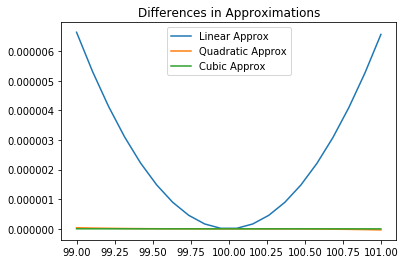

In [3]:
def F(y, *args):
    x, = args
    error = (((x ** 0.35) + 0.9 * x - y) ** (-2.5)) -\
            (0.95 * ((y ** 0.35 + 0.9 * y) ** (-2.5)))
    return error

def first_der(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def second_der(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def third_der(f, x, h = 1e-2):
    return (f(x + 2*h) - 2 * f(x + h) + 2 * f(x - h) - f(x - 2*h))/(2*(h**3))

def first_approx(f, x0, x):
     return f(x0) + first_der(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_der(f, x0)*(x - x0) + 0.5* second_der(f,x0)*(x - x0) ** 2

def third_approx(f, x0, x):
    return f(x0) + first_der(f, x0)*(x - x0) + 0.5* second_der(f,x0)*(x - x0) ** 2 + \
            1/6* third_der(f,x0)*(x - x0) ** 3

x0 = 100
y0 = 49.2166
x = np.linspace(99,101,20)
y = np.repeat(49.,20)

g = lambda x: opt.fsolve(F, y0, args = x)

#actual y
for i in range(len(x)):
    y[i] = g(x[i])
#first order approx
lin = first_approx(g, x0, x)
#second order approx
quad = second_approx(g, x0, x)
#third order approx
cube = third_approx(g, x0, x)

diff1 = lin - y
diff2 = quad - y
diff3 = cube - y
plt.plot(x, diff1, label='Linear Approx')
plt.plot(x, diff2, label='Quadratic Approx')
plt.plot(x, diff3, label='Cubic Approx')
plt.title('Differences in Approximations')
plt.legend()
plt.show()

### Exercise 4


Hx= 2.9154518950437325 Hxx=  -1.3426906999188575


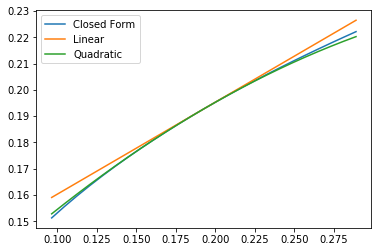

In [8]:
# Set Parameters
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02

# Set kgrid
kbar = (alpha * beta)**(1/(1-alpha))
kgrid = np.linspace(0.5*kbar, 1.5*kbar, 25)
sizek = len(kgrid)

def getFy(k):
    Fy = alpha*beta*(k**(alpha - 1))/(k**alpha - k)
    return Fy

def getFx(k):
    Fx = -alpha*beta*(k**(alpha - 1))*(alpha + kbar**(alpha - 1))/(k**alpha - k)
    return Fx

def getFu(k):
    Fu = alpha**2*beta*(k**(alpha - 1))**2/(k**alpha - k)
    return Fu

def getFyy(k):
    Fyy = 2*alpha*beta*(k**(alpha - 1))/(k**alpha - k)**2
    return Fyy

def getFyu(k):
    Fyu = alpha**2*beta*(k**(alpha - 1)**2)/(k**alpha - k)**2
    return Fyu
    
def getFyx(k):
    Fyx = alpha*beta*(k**alpha)*(k**(alpha - 1)*(1+ alpha - (alpha + 1)*k**(alpha - 1)))/(k**alpha - k)**3
    return Fyx

def getFxx(k):
    Fxx = alpha*beta*(k**alpha)*2*((k**(alpha - 1)**3) + (alpha**2 + 3*alpha - 4)*\
          (k**(alpha - 1)**2)- 2*(2*alpha - 1)*(k**(alpha-1)) - alpha**2 + alpha)/(k**alpha - k)**3
    return Fxx
    
def getFxu(k):
    Fxu = -alpha**2*beta*(k**(alpha - 1)**2)*(k**(alpha - 1) + (alpha - 1))/(k**alpha - k)**2
    return Fxu
    
def getFuu(k):
    Fuu = alpha**2*(alpha - 1)*beta*(k**(2*alpha - 3))/(k**alpha - k)
    return Fuu

def get_der(kbar):
    Fy = getFy(kbar)
    Fx = getFx(kbar)
    Fu = getFu(kbar)
    Fyy = getFyy(kbar)
    Fyu = getFyu(kbar)
    Fyx = getFyx(kbar)
    Fxx = getFxx(kbar)
    Fxu = getFxu(kbar)
    Fuu = getFuu(kbar)
    xu = -(Fx + np.sqrt(Fx**2 - 4*Fu*Fy))/(2*Fy)
    xuu = -(Fyy*(xu**4) + 2*Fyx*(xu**3) + 2*Fyu*(xu**2) + Fxx*(xu**2) +\
            2*Fxu*xu + Fuu)/(Fy*(xu**2) + Fy*xu + Fx)
    return xu, xuu

# Uhlig functions
F = (alpha * beta * kbar ** (alpha - 1)) / ((kbar ** alpha) - kbar)
G = - (beta * alpha * kbar **(alpha - 1) * (alpha + kbar ** (alpha-1))) / (kbar**alpha - kbar)
H = (beta * alpha ** 2 * kbar ** (2 * (alpha - 1))) / (kbar ** alpha - kbar)
L = - (alpha * beta * kbar**alpha) / (kbar ** alpha - kbar)
M = (alpha * beta * kbar ** (2 * alpha - 1)) / (kbar ** alpha - kbar)

Hx = (-G + np.sqrt(G **2 - 4 * F * H)) / (2 * F)

(xu, xuu) = get_der(kbar)
Hxx = xuu
# Print Hx & Hxx
print("Hx=", Hx, "Hxx= ", Hxx)
closed = alpha*beta*(kgrid**alpha)
lin = kbar + xu*(kgrid - kbar)
quad = kbar + xu*(kgrid - kbar) + 0.5*xuu*(kgrid - kbar)**2
plt.plot(kgrid, closed, label = "Closed Form")
plt.plot(kgrid, lin, label = "Linear")
plt.plot(kgrid, quad, label = "Quadratic")
plt.legend()
plt.show()

### Exercise 5


### Exercise 6
